## WiiU Games
### WiiU Games EDA with Recommendation System

#### Content
The dataset includes all games for WiiU

The dataset is prepared by Alexander Filin

Here is the dataset link : https://www.kaggle.com/infamous25700/wiiu-games

## Content

<ul>
  <li><a href="#part1">1. Loading Data and Checking Values</a></li>
  <li><a href="#part2">2. Description of  Columns in Dataframe</a>
  <li><a href="#part3">3. Data Wrangling</a>
    <ul>
      <li><a href="#part3-1">3.1 Defining new dataframes not containing "Unreleased" of each Release date</a></li>
      <li><a href="#part3-2">3.2 Removing nan values from Release date in each dataframe</a></li>        
      <li><a href="#part3-3">3.3 Seperate month and year from Release date Column of each dataframe</a></li>
      <li><a href="#part3-3">3.4 Create new 3 dataframe for pie graph by genre, developer and publisher in wii dataframe</a></li>
    </ul>
  </li>
  <li><a href="#part4">4. Data Visualization</a>
    <ul>
      <li><a href="#part4-1">4.1 Define a Time period showing released games by Japan</a></li>
      <li><a href="#part4-2">4.2 Define a Time period showing released games by North America</a></li>
      <li><a href="#part4-3">4.3 Define a Time period showing released games by Australasia</a></li>
      <li><a href="#part4-4">4.4 Define a Time period showing released games by Europe</a></li>
      <li><a href="#part4-5">4.5 Show the spectrum of wii games by genre, developer and publisher</a></li>
    </ul>
  </li>
  <li><a href="#part5">5. Recommendation System</a>
    <ul>
      <li><a href="#part5-1">5.1 Recommendation System by using Levenshtein Distance</a></li>
    </ul>
  </li>  
</ul>

<a id='part1'></a>
## 1. Loading Data and Checking Values

In [82]:
# !pip install -U strsimpy

1 - Import libraries I used for visualization

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
import datetime
import matplotlib.cm as mplcm
import random
import matplotlib.colors as mcolors
import requests
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import matplotlib.image as mpimg 
from strsimpy.levenshtein import Levenshtein
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

2 - Define dataframe after loading all values from csv file and assigning them to it

In [84]:
file_location_url = "files/wiiu_games.csv";

wii_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "utf-8")

3 - Deterime how many rows and columns are defined in dataframe

In [85]:
row_count = wii_df.shape[0]
column_count = wii_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 781 , Column : 8


4 - Show first 5 values of dataframe

In [86]:
wii_df.head()

,Title,Genre(s),Developer(s),Publisher(s),Release date(Japan),Release date(NA),Release date(Australasia),Release date(Europe)
0,007 Legends,First-person shooter,Eurocom,Activision,Unreleased,"December 11, 2012",Unreleased,"December 7, 2012"
1,1001 Spikes,Platformpuzzle,8bits Fanatics,Nicalis,"November 25, 2015","June 3, 2014",Unreleased,"October 1, 2015"
2,140,Platform,Double Fine Productions,Abstraction Games,Unreleased,"September 1, 2016",Unreleased,"September 1, 2016"
3,153 Hand Video Poker,Simulation,Skunk Software,Skunk Software,Unreleased,"June 2, 2016",Unreleased,Unreleased
4,3Souls,Puzzle platformer,Red Column,Red Column,Unreleased,"July 28, 2016","July 28, 2016","July 28, 2016"


5 - Show last 5 values of dataframe

In [87]:
wii_df.tail()

,Title,Genre(s),Developer(s),Publisher(s),Release date(Japan),Release date(NA),Release date(Australasia),Release date(Europe)
776,Zombeer,"Action, first-person shooter",Padaone Games,Padaone Games,Unreleased,"April 13, 2017",Unreleased,Unreleased
777,Zombie Brigade: No Brain No Gain,Action,Cypronia,Cypronia,Unreleased,"January 5, 2017",Unreleased,"December 22, 2016"
778,Zombie Defense,Tower defense,Teyon,Teyon,"August 5, 2015","September 17, 2015",Unreleased,"September 3, 2015"
779,ZombiU,Survival horror,Ubisoft Montpellier,Ubisoft,"December 8, 2012","November 18, 2012","November 30, 2012","November 30, 2012"
780,Zumba Fitness: World Party,Fitness,Zoë Mode,JP: Hamster CorporationWW: Majesco Entertainment,"September 4, 2014","November 5, 2013","November 22, 2013","November 22, 2013"


6 - Show each column information of dataframe

In [88]:
wii_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Title                      781 non-null    object
 1   Genre(s)                   781 non-null    object
 2   Developer(s)               781 non-null    object
 3   Publisher(s)               781 non-null    object
 4   Release date(Japan)        781 non-null    object
 5   Release date(NA)           781 non-null    object
 6   Release date(Australasia)  781 non-null    object
 7   Release date(Europe)       780 non-null    object
dtypes: object(8)
memory usage: 48.9+ KB


7 - Show how many variables there are in dataframe

In [89]:
wii_df.count()

Title                        781
Genre(s)                     781
Developer(s)                 781
Publisher(s)                 781
Release date(Japan)          781
Release date(NA)             781
Release date(Australasia)    781
Release date(Europe)         780
dtype: int64

8 - Show descriptive statistics of dataframe

In [90]:
wii_df.describe()

,Title,Genre(s),Developer(s),Publisher(s),Release date(Japan),Release date(NA),Release date(Australasia),Release date(Europe)
count,781,781,781,781,781,781,781,780
unique,781,199,472,358,173,348,183,303
top,Rock 'N Racing Off Road,Puzzle,RCMADIAX,Nintendo,Unreleased,Unreleased,Unreleased,Unreleased
freq,1,69,36,54,540,68,540,213


9 - Determine if null values of each column are in a dataframe

In [91]:
wii_df.isnull().sum()

Title                        0
Genre(s)                     0
Developer(s)                 0
Publisher(s)                 0
Release date(Japan)          0
Release date(NA)             0
Release date(Australasia)    0
Release date(Europe)         1
dtype: int64

<a id='part2'></a>
## 2. Description of  Columns in Dataframe

In [92]:
values = [
  ['Title', 
   'Genre(s)', 
   'Developer(s)',
   'Publisher(s)',
   'Release date(Japan)',
   'Release date(NA)',
   'Release date(Australasia)',
   'Release date(Europe)',
  ],  #1st col
  ["A Title of the game", 
   "A Genre of the game",
   "A Developer of the game",  
   "A Publisher of the game",
   "A Release date for Japan",
   "A Release date for North America",
   "A Release date for Australasia",
   "A Release date for Europe",
  ] #2nd col
] 

layout = go.Layout(title="A Description of Columns in Dataframe", 
                   height=500, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[go.Table(
  columnwidth = [200,400],
  header = dict(
    values = [['<b>COLUMN NAME</b>'],
              ['<b>DESCRIPTION</b>']
             ],
    line_color='darkgoldenrod',
    fill_color='goldenrod',
    align=['left','center'],
    font=dict(color='white', size=12),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['gold', 'yellow']),
    align=['left', 'left'],
    font_size=12,
    height=30)
    )
], layout = layout)
pio.write_image(fig, "images/image1.png")
fig.show()

<a id='part3'></a>
## 3. Data Wrangling

<a id='part3-1'></a>
### 3.1 Defining new dataframes not containing "Unreleased" of each Release date

In [93]:
wii_df_japan = wii_df[wii_df["Release date(Japan)"] != "Unreleased"]
wii_df_na = wii_df[wii_df["Release date(NA)"] != "Unreleased"]
wii_df_australasia = wii_df[wii_df["Release date(Australasia)"] != "Unreleased"]
wii_df_europe = wii_df[wii_df["Release date(Europe)"] != "Unreleased"]

<a id='part3-2'></a>
### 3.2 Removing nan values from Release date in each dataframe

In [94]:
wii_df_japan.dropna(subset = ['Release date(Europe)'],inplace=True)
wii_df_na.dropna(subset = ['Release date(Europe)'],inplace=True)
wii_df_australasia.dropna(subset = ['Release date(Europe)'],inplace=True)
wii_df_europe.dropna(subset = ['Release date(Europe)'],inplace=True)

<a id='part3-3'></a>
### 3.3 Seperate month and year from Release date Column of each dataframe

In [95]:
def defineDate(df,column_name):
    df[column_name] = pd.to_datetime(df[column_name],utc=True)
    df[column_name] = df[column_name].dt.strftime('%d-%m-%Y')

In [96]:
def seperateMonthAndDate(df,column_name):
    df['Month'] = df[column_name].apply(lambda x : x.split('-')[1])
    df['Year'] = df[column_name].apply(lambda x : x.lstrip().split('-')[-1])

In [97]:
def convertdatetime(defined_list):    
    sample_list = []
    for date in defined_list:
        month = ""
        if(date in "01"):
            month = "January"
        if(date in "02"):
            month = "February"
        if(date in "03"):
            month = "March"
        if(date in "04"):
            month = "April"
        if(date in "05"):
            month = "May"
        if(date in "06"):
            month = "June"
        if(date in "07"):
            month = "July"
        if(date in "08"):
            month = "August"
        if(date in "09"):
            month = "September"
        if(date in "10"):
            month = "October"
        if(date in "11"):
            month = "November"
        if(date in "12"):
            month = "December"
        sample_list.append(str(month))    
    return sample_list

In [98]:
defineDate(wii_df_japan,"Release date(Japan)")
defineDate(wii_df_na,"Release date(NA)")
defineDate(wii_df_australasia,"Release date(Australasia)")
defineDate(wii_df_europe,"Release date(Europe)")


seperateMonthAndDate(wii_df_japan,"Release date(Japan)")
seperateMonthAndDate(wii_df_na,"Release date(NA)")
seperateMonthAndDate(wii_df_australasia,"Release date(Australasia)")
seperateMonthAndDate(wii_df_europe,"Release date(Europe)")


date_of_month_list_wii_japan = wii_df_japan['Month'].to_list()
date_of_month_list_wii_na = wii_df_na['Month'].to_list()
date_of_month_list_wii_australasia = wii_df_australasia['Month'].to_list()
date_of_month_list_wii_europe = wii_df_europe['Month'].to_list()

month_list_japan = convertdatetime(date_of_month_list_wii_japan)
month_list_na = convertdatetime(date_of_month_list_wii_na)
month_list_australasia = convertdatetime(date_of_month_list_wii_australasia)
month_list_europe = convertdatetime(date_of_month_list_wii_europe)

wii_df_japan['Month'] = month_list_japan
wii_df_na['Month'] = month_list_na
wii_df_australasia['Month'] = month_list_australasia
wii_df_europe['Month'] = month_list_europe

<a id='part3-4'></a>
### 3.4 Create new 3 dataframe for pie graph by genre, developer and publisher in wii dataframe

In [99]:
wii_df_genre = pd.DataFrame({'count' : wii_df.groupby(['Genre(s)']).size()}).reset_index()
wii_df_genre = wii_df_genre.sort_values(['count'], ascending = False)

df2 = wii_df_genre[:10].copy()

new_row = pd.DataFrame(data = {
    'Genre(s)' : ['others'],
    'count' : [wii_df_genre['count'][10:].sum()]
})


wii_df_genre_top_10_others = pd.concat([df2, new_row])
wii_df_genre_top_10_others = wii_df_genre_top_10_others.reset_index(drop=True)
wii_df_genre_top_10_others

,Genre(s),count
0,Puzzle,69
1,Action,56
2,Platform,49
3,Action-adventure,37
4,Party,32
5,Arcade,24
6,Actionadventure,24
7,Racing,20
8,Sports,19
9,Puzzlestrategy,17


In [100]:
wii_df_developer = pd.DataFrame({'count' : wii_df.groupby(['Developer(s)']).size()}).reset_index()
wii_df_developer = wii_df_developer.sort_values(['count'], ascending = False)

df2 = wii_df_developer[:10].copy()

new_row = pd.DataFrame(data = {
    'Developer(s)' : ['others'],
    'count' : [wii_df_developer['count'][10:].sum()]
})


wii_df_developer_top_10_others = pd.concat([df2, new_row])
wii_df_developer_top_10_others = wii_df_developer_top_10_others.reset_index(drop=True)
wii_df_developer_top_10_others

,Developer(s),count
0,RCMADIAX,36
1,Skunk Software,15
2,Capcom,10
3,EnjoyUp Games,10
4,nuGAME,10
5,Cypronia,9
6,Nintendo EAD,9
7,RandomSpin,9
8,Nintendo,8
9,Joindots,7


In [101]:
wii_df_publisher = pd.DataFrame({'count' : wii_df.groupby(['Publisher(s)']).size()}).reset_index()
wii_df_publisher = wii_df_publisher.sort_values(['count'], ascending = False)

df2 = wii_df_publisher[:10].copy()

new_row = pd.DataFrame(data = {
    'Publisher(s)' : ['others'],
    'count' : [wii_df_publisher['count'][10:].sum()]
})


wii_df_publisher_top_10_others = pd.concat([df2, new_row])
wii_df_publisher_top_10_others = wii_df_publisher_top_10_others.reset_index(drop=True)
wii_df_publisher_top_10_others

,Publisher(s),count
0,Nintendo,54
1,RCMADIAX,33
2,Activision,22
3,Ubisoft,22
4,EnjoyUp Games,15
5,Warner Bros. Interactive Entertainment,14
6,Skunk Software,14
7,Capcom,13
8,RandomSpin,11
9,Joindots,10


<a id='part4'></a>
## 4. Data Visualization

<a id='part4-1'></a>
### 4.1 Define a Time period showing released games by Japan

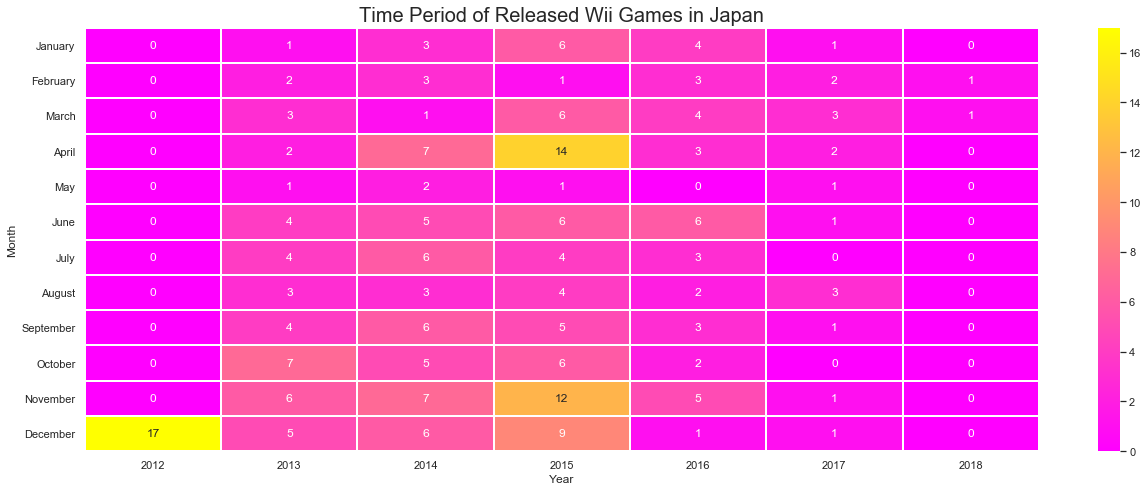

In [102]:
plt.figure(figsize=(18, 7))
wii_df_japan.reset_index(inplace = True)
wii_df_japan['Month'] = pd.Categorical(wii_df_japan['Month'], 
                                                categories=['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                                ordered=True)

wii_df_japan_timeline = wii_df_japan.groupby(["Year", "Month"])["index"].size().reset_index()
wii_df_japan_timeline = wii_df_japan_timeline.pivot("Month", "Year", "index")
sns.heatmap(wii_df_japan_timeline, cmap="spring", linewidths=1 ,xticklabels=True, yticklabels=True,annot = True)

plt.title("Time Period of Released Wii Games in Japan", y=1, fontsize=20)
plt.xlabel('Year')
plt.ylabel('Month')
plt.savefig('images/image2.png', bbox_inches = "tight")
plt.tight_layout()
plt.show()

<a id='part4-2'></a>
### 4.2 Define a Time period showing released games by North America

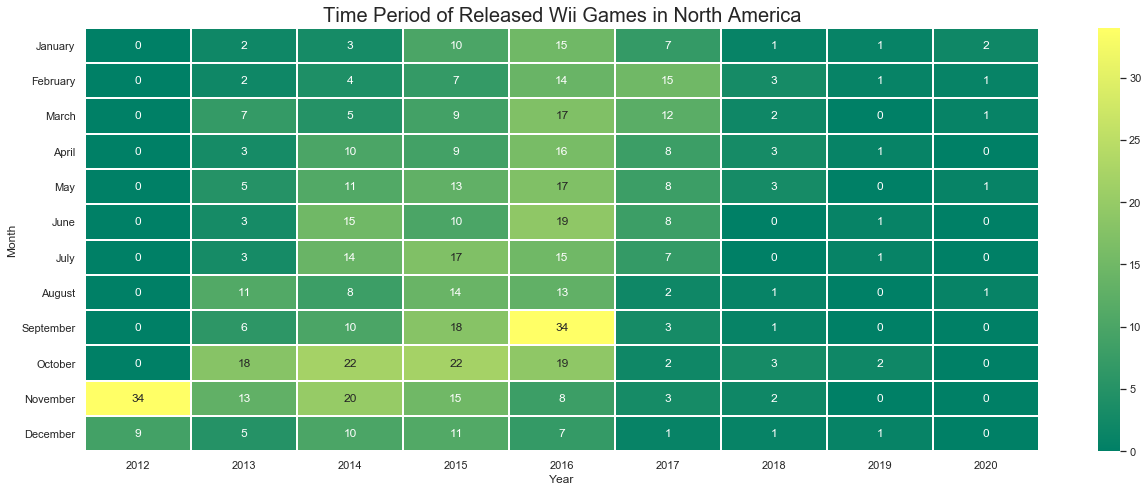

In [103]:
plt.figure(figsize=(18, 7))
wii_df_na.reset_index(inplace = True)
wii_df_na['Month'] = pd.Categorical(wii_df_na['Month'], 
                                                categories=['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                                ordered=True)

wii_df_na_timeline = wii_df_na.groupby(["Year", "Month"])["index"].size().reset_index()
wii_df_na_timeline = wii_df_na_timeline.pivot("Month", "Year", "index")
sns.heatmap(wii_df_na_timeline, cmap="summer", linewidths=1 ,xticklabels=True, yticklabels=True,annot = True)

plt.title("Time Period of Released Wii Games in North America", y=1, fontsize=20)
plt.xlabel('Year')
plt.ylabel('Month')
plt.savefig('images/image3.png', bbox_inches = "tight")
plt.tight_layout()
plt.show()

<a id='part4-3'></a>
### 4.3 Define a Time period showing released games by Australasia

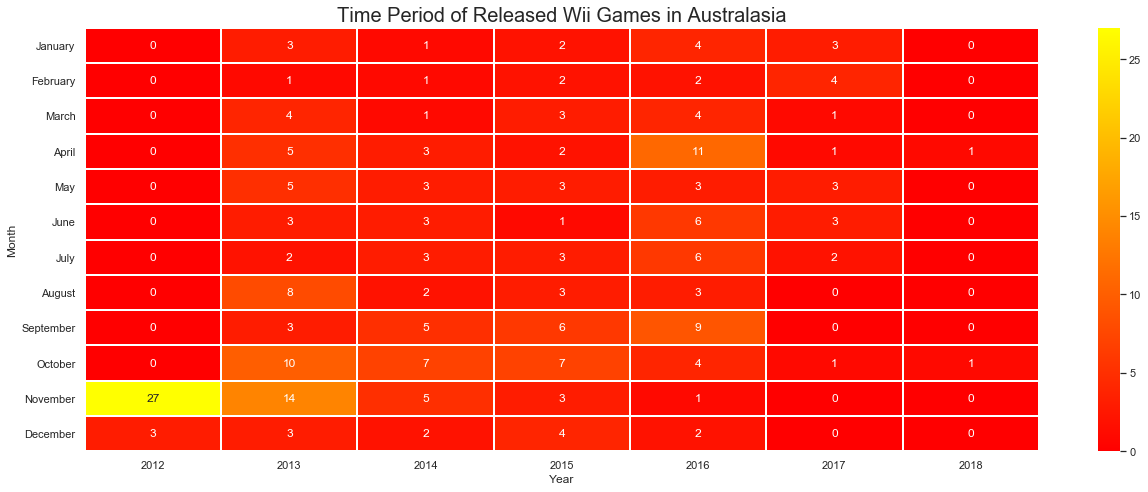

In [104]:
plt.figure(figsize=(18, 7))
wii_df_australasia.reset_index(inplace = True)
wii_df_australasia['Month'] = pd.Categorical(wii_df_australasia['Month'], 
                                                categories=['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                                ordered=True)

wii_df_australasia_timeline = wii_df_australasia.groupby(["Year", "Month"])["index"].size().reset_index()
wii_df_australasia_timeline = wii_df_australasia_timeline.pivot("Month", "Year", "index")
sns.heatmap(wii_df_australasia_timeline, cmap="autumn", linewidths=1 ,xticklabels=True, yticklabels=True,annot = True)

plt.title("Time Period of Released Wii Games in Australasia", y=1, fontsize=20)
plt.xlabel('Year')
plt.ylabel('Month')
plt.savefig('images/image4.png', bbox_inches = "tight")
plt.tight_layout()
plt.show()

<a id='part4-4'></a>
### 4.4 Define a Time period showing released games by Europe

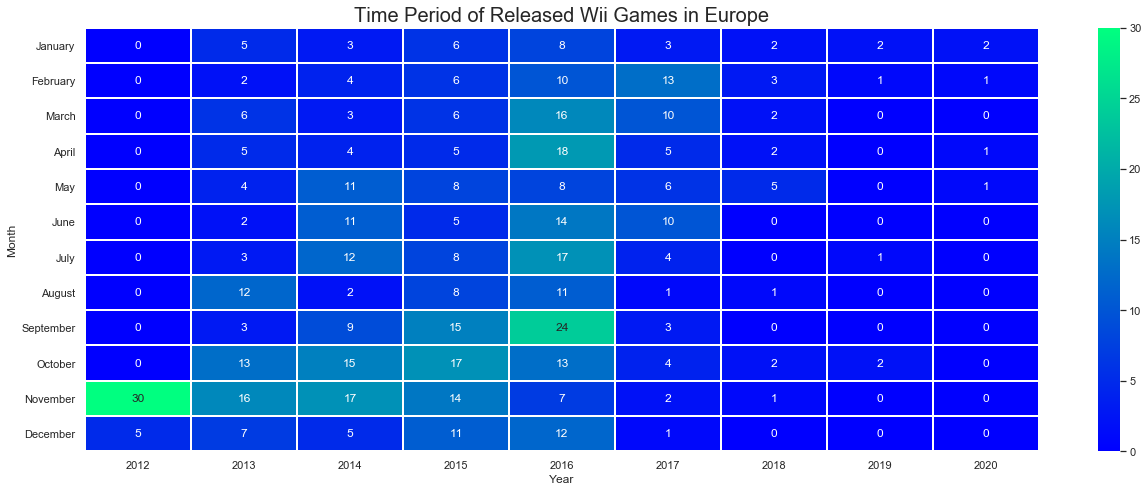

In [105]:
plt.figure(figsize=(18, 7))
wii_df_europe.reset_index(inplace = True)
wii_df_europe['Month'] = pd.Categorical(wii_df_europe['Month'], 
                                                categories=['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                                ordered=True)

wii_df_europe_timeline = wii_df_europe.groupby(["Year", "Month"])["index"].size().reset_index()
wii_df_europe_timeline = wii_df_europe_timeline.pivot("Month", "Year", "index")
sns.heatmap(wii_df_europe_timeline, cmap="winter", linewidths=1 ,xticklabels=True, yticklabels=True,annot = True)

plt.title("Time Period of Released Wii Games in Europe", y=1, fontsize=20)
plt.xlabel('Year')
plt.ylabel('Month')
plt.savefig('images/image5.png', bbox_inches = "tight")
plt.tight_layout()
plt.show()

<a id='part4-5'></a>
### 4.5 Show the spectrum of wii games by genre, developer and publisher

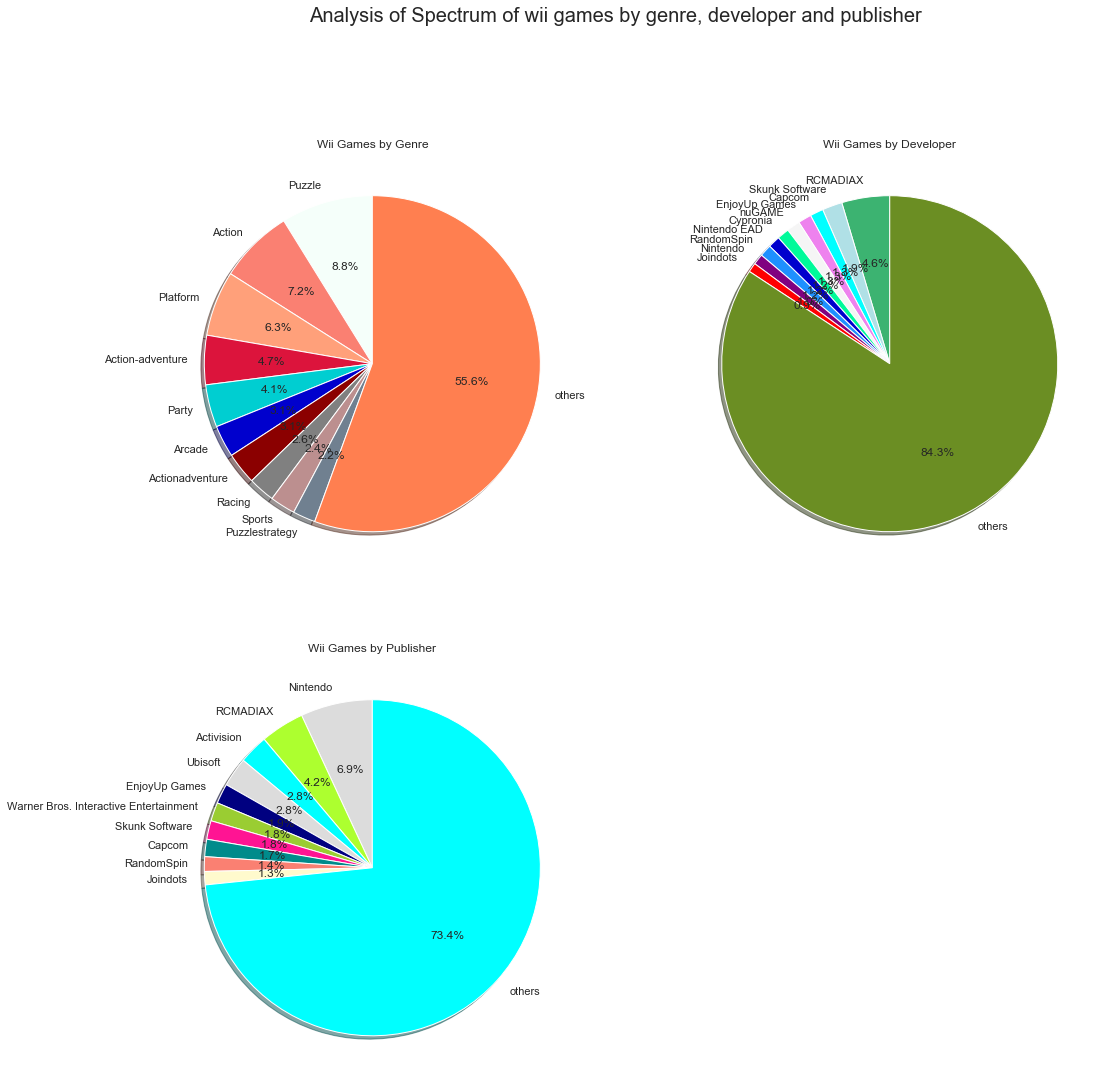

In [106]:
f,a = plt.subplots(2,2,figsize=(17,17))
f.subplots_adjust(wspace = .2)


colors_1 = random.choices(list(mcolors.CSS4_COLORS.values()),k = wii_df_genre_top_10_others.size)
colors_2 = random.choices(list(mcolors.CSS4_COLORS.values()),k = wii_df_developer_top_10_others.size)
colors_3 = random.choices(list(mcolors.CSS4_COLORS.values()),k = wii_df_publisher_top_10_others.size)

a[0,0].pie(wii_df_genre_top_10_others["count"], 
        labels = wii_df_genre_top_10_others["Genre(s)"],  
        startangle=90, shadow = True, autopct = '%1.1f%%', colors = colors_1)

a[0,0].set_title('Wii Games by Genre')
a[0,0].set_ylabel('');


a[0,1].pie(wii_df_developer_top_10_others["count"], 
        labels = wii_df_developer_top_10_others["Developer(s)"],  
        startangle=90, shadow = True, autopct = '%1.1f%%', colors = colors_2)

a[0,1].set_title('Wii Games by Developer')
a[0,1].set_ylabel('');


a[1,0].pie(wii_df_publisher_top_10_others["count"], 
        labels = wii_df_publisher_top_10_others["Publisher(s)"],  
        startangle=90, shadow = True, autopct = '%1.1f%%', colors = colors_3)

a[1,0].set_title('Wii Games by Publisher')
a[1,0].set_ylabel('');

# delete extra plot
f.delaxes(a[1][1])

f.suptitle("Analysis of Spectrum of wii games by genre, developer and publisher", y=1, fontsize=20)
plt.savefig('images/image6.png')
plt.show()

<a id='part5'></a>
## 5. Recommendation System

In [107]:
# This is a function to find the closest game title from the list
def find_word(word,words):
    t=[]
    count=0
    if word[-1]==' ':
        word=word[:-1]
    for i in words:
        if word.lower() in i.lower():
            t.append([len(word)/len(i),count])
        else:
            t.append([0,count])
        count+=1
    t.sort(reverse=True)
    return words[t[0][1]]

In [108]:
wii_df["Title"].unique()

array(['007 Legends', '1001 Spikes', '140', '153 Hand Video Poker',
       '3Souls', '6-Hand Video Poker', '6180 the moon', '8Bit Hero',
       '99Moves', '99Seconds', 'Absolutely Unstoppable MineRun', 'Abyss',
       'Ace: Alien Cleanup Elite', 'Ace of Seafood',
       'Act It Out! A Game of Charades',
       'Adventure Party: Cats and Caverns',
       "Adventure Time: Explore the Dungeon Because I Don't Know!",
       'Adventure Time: Finn & Jake Investigations', 'Adventures of Pip',
       'Aenigma Os', 'Affordable Space Adventures', 'Alice in Wonderland',
       'Alphadia Genesis', 'The Amazing Spider-Man: Ultimate Edition',
       'The Amazing Spider-Man 2', 'Angry Birds Star Wars',
       'Angry Birds Trilogy', 'Angry Bunnies: Colossal Carrot Crusade',
       'Angry Video Game Nerd Adventures',
       'Animal Crossing: Amiibo Festival', 'Animal Gods', 'Annihilation',
       'Another World: 20th Anniversary Edition', 'Aperion Cyberstorm',
       'Aqua Moto Racing Utopia', 'Aqua TV

In [109]:
wii_df['Genre(s)'].unique()

array(['First-person shooter', 'Platformpuzzle', 'Platform', 'Simulation',
       'Puzzle platformer', 'Puzzlestrategy', 'Actionadventure', 'Action',
       'Adventure', 'Actionarcadefirst-person shooterfighting', 'Party',
       'Action-adventure', 'Action-adventurerole-playing', 'Puzzle',
       'Adventurepuzzle', 'Visual Novel', 'Japanese role-playing',
       'Puzzlesplatform', 'Arcadefirst-person shooter',
       'Platformaction-adventure', 'Twin-stick shooter', 'Lifestyle',
       'Sports', 'platform', 'Point-and-click adventure',
       'Puzzleplatform', 'Actionadventurearcadefighting',
       'Action-adventureplatformer', 'Role-playing',
       'Action-adventurestealth', 'Educationadventurepuzzle',
       'Arcadestrategy', 'Metroidvania', 'Arcade', 'Actionshooter',
       'Musicfitnesslifestyle', "Action-adventureshoot 'em up",
       'Actionhack and slash', 'Platformmusic',
       'Adventureplatformerpuzzle', "Beat 'em upfighting", 'Roguelike',
       'First-person shooteracti

In [110]:
wii_df.drop(['Release date(Japan)',
         'Release date(NA)',
         'Release date(Australasia)',
         'Release date(Europe)',
         'Developer(s)'    
        ], axis = 1, inplace = True) 

<a id='part5-1'></a>
### 5.1 Recommendation System by using Levenshtein Distance

In [111]:
levenshtein = Levenshtein()

In [112]:
# Making a weight matrix using Levenshtein distance
def recommendationSystembyLevenshteinDistance(data,game,number):
    print("Recommendation System by using Levenshtein Distance")
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    games=data['Title'].values
    best=find_word(game,games)
    print('The game closest to your search is :', best)
    genre=data[data['Title']==best]['Genre(s)'].values[0]
    print('The genre closest to your search is :', genre)
    df=data[data['Genre(s)']==genre]
    x=df[df['Title']==best].drop(columns=['Genre(s)','Title']).values
    if len(x)>1:
        x=x[1]
    games_names=df['Title'].values
    df.drop(columns=['Genre(s)','Title'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([levenshtein.distance(x,i),count])
        count+=1
    p.sort()
    print('Recommendation of Game List')
    for i in range(1,number+1):
        print(games_names[p[i][1]])    

In [113]:
search_game=input('Please enter The name of the wiigame :')
number=int(input('Please enter the number of recommendations you want: '))
recommendationSystembyLevenshteinDistance(wii_df,search_game,number)

Please enter The name of the wiigame :Turbo
Please enter the number of recommendations you want: 3
Recommendation System by using Levenshtein Distance
The game closest to your search is : Turbo: Super Stunt Squad
The genre closest to your search is : Action
Recommendation of Game List
99Moves
99Seconds
Ace of Seafood
